In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [17]:
iris = load_iris()
X = iris.data
y = iris.target

In [18]:
binary_mask = y < 2
X = X[binary_mask]
y = y[binary_mask]

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [20]:
resized_X = np.zeros((X.shape[0], 150, 150, 3))
for i in range(X.shape[0]):
    reshaped = X[i].reshape(2, 2, 1)
    resized_X[i] = np.pad(reshaped, ((0, 148), (0, 148), (0, 2)), 'constant')

In [21]:
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(resized_X, y, test_size=0.2, random_state=42)


In [23]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(64, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.5000 - loss: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.0000e+00
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.0000e+00
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.0000e+00
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.0000e+00
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.0000e+00
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.0000e+00
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.0000e+00
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 0.0000e+00 - val

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6000 - loss: 0.0000e+00
Test Loss: 0.0000, Test Accuracy: 0.6000


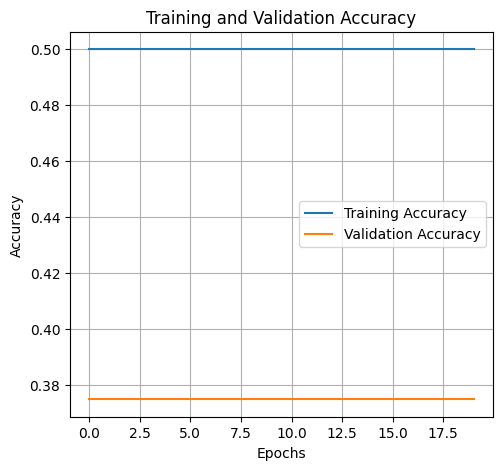

In [35]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

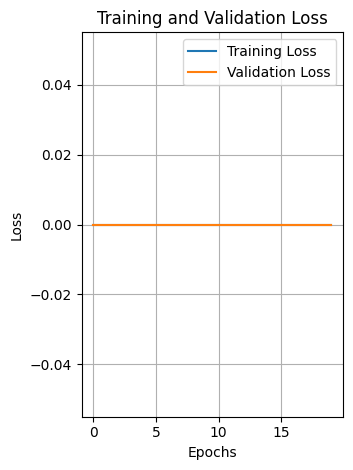

In [37]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()
